In [20]:
!pip install aif360
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys 
import os  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
dataset = pd.read_csv('/content/gdrive/My Drive/Fairness inAI/Ricci.csv')
dataset = dataset.drop(labels='Unnamed: 0', axis= 1)


In [23]:
dataset.groupby('Race').nunique()

,Race,Position,Oral,Written,Combine
Race,,,,,
B,1,2,26,19,27
H,1,2,23,15,23
W,1,2,51,30,64


In [24]:
dataset.describe()

,Oral,Written,Combine
count,118.000000,118.000000,118.000000
mean,65.523390,71.652542,69.200881
std,12.421927,10.622808,9.387575
min,40.830000,46.000000,45.932000
25%,55.387500,65.000000,60.942000
50%,66.040000,71.500000,69.502000
75%,73.810000,78.500000,75.832000
max,92.080000,95.000000,92.808000


In [25]:
dataset.query('Position == Position.max()')

,Race,Position,Oral,Written,Combine
41,W,Lieutenant,88.75,91,90.100
42,W,Lieutenant,87.50,87,87.200
43,W,Lieutenant,77.50,91,85.600
44,W,Lieutenant,85.00,84,84.400
45,W,Lieutenant,80.00,87,84.200
...,...,...,...,...,...
113,H,Lieutenant,40.83,64,54.732
114,B,Lieutenant,52.08,56,54.432
115,H,Lieutenant,48.33,58,54.132
116,B,Lieutenant,52.92,49,50.568


In [26]:
dataset.groupby(['Position', 'Race']).describe()['Oral']

count       mean        std  ...     50%      75%    max
Position   Race                               ...                        
Captain    B       8.0  65.892500   9.782318  ...  68.095  70.5975  82.38
           H       8.0  63.928750  11.690974  ...  63.810  71.5475  79.05
           W      25.0  72.362000  11.737808  ...  73.810  80.0000  89.52
Lieutenant B      19.0  63.135263  11.592291  ...  60.830  70.0000  92.08
           H      15.0  53.361333   8.937207  ...  51.670  56.8750  70.83
           W      43.0  67.073256  11.914666  ...  68.330  73.9600  88.75

[6 rows x 8 columns]

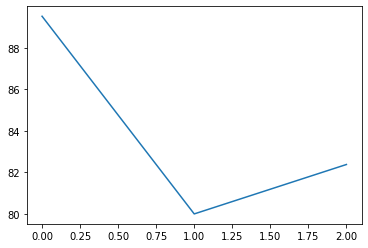

In [27]:
A = []
for i in range (0,3):
  A.append(dataset.groupby(['Position', 'Race'])['Oral'].head()[i])

plt.plot(range(0,len(A)),A)

In [28]:
dataset.groupby(['Position', 'Race'])['Written'].describe()

count       mean        std   min    25%   50%    75%   max
Position   Race                                                             
Captain    B       8.0  62.375000  11.500776  49.0  52.25  63.0  71.00  77.0
           H       8.0  71.625000   8.450486  61.0  65.00  70.5  76.75  84.0
           W      25.0  75.280000   8.928046  58.0  69.00  75.0  81.00  95.0
Lieutenant B      19.0  64.105263  10.213796  46.0  58.00  64.0  69.50  86.0
           H      15.0  70.466667   6.128000  58.0  67.50  71.0  72.50  82.0
           W      43.0  75.023256  10.747067  57.0  66.00  74.0  84.00  95.0

In [29]:
dataset.groupby(['Position', 'Race'])['Combine'].describe()

count       mean       std  ...     50%     75%     max
Position   Race                              ...                        
Captain    B       8.0  63.782000  8.492689  ...  63.900  70.742  74.952
           H       8.0  68.546500  8.701684  ...  67.524  76.615  79.676
           W      25.0  74.112800  8.251842  ...  73.732  78.124  92.808
Lieutenant B      19.0  63.717263  9.076899  ...  61.068  72.482  76.600
           H      15.0  63.624533  5.768875  ...  63.268  68.666  71.200
           W      43.0  71.843256  9.145921  ...  70.732  78.766  90.100

[6 rows x 8 columns]

In [46]:
labels = (dataset.columns.values)
print(labels)
labels = np.reshape(labels, (np.asarray(labels).shape[0],1)).ravel()
print(labels[1])
np_dataset = dataset.to_numpy()
print(np_dataset.shape)

['Race' 'Position' 'Oral' 'Written' 'Combine']
Position
(118, 5)


# First step 

modify data : removing features taht should not be used for classification (protected attributes)
We put the privileged group to 1 (race : W)
All the other value are set to 0 ( race : H, B)

Preprocessing

we scale the value between 0 and 1 and we put the privileged group at 1


In [31]:
proc_dataset= dataset.replace(['W','B','H','Captain','Lieutenant'],[1,0,0,1,0])
proc_dataset['Oral']= (proc_dataset['Oral']-min(proc_dataset['Oral']))/(max(proc_dataset['Oral'])-min(proc_dataset['Oral']))
proc_dataset['Written']= (proc_dataset['Written']-min(proc_dataset['Written']))/(max(proc_dataset['Written'])-min(proc_dataset['Written']))
proc_dataset['Combine']= (proc_dataset['Combine']-min(proc_dataset['Combine']))/(max(proc_dataset['Combine'])-min(proc_dataset['Combine']))
proc_dataset.head()

,Race,Position,Oral,Written,Combine
0,1,1,0.950049,1.000000,1.000000
1,1,1,0.764293,1.000000,0.918764
2,1,1,0.810732,0.836735,0.836675
3,1,1,0.931512,0.612245,0.748699
4,1,1,0.689951,0.775510,0.745456


In [67]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(proc_dataset, test_size=0.2)

print(train)

     Race  Position      Oral   Written   Combine
38      1         1  0.253268  0.244898  0.221691
11      1         1  0.764293  0.571429  0.649970
13      1         1  0.643512  0.632653  0.635549
69      1         0  0.487805  0.571429  0.529055
24      1         1  0.597073  0.448980  0.500043
..    ...       ...       ...       ...       ...
88      1         0  0.187122  0.591837  0.410359
54      0         0  0.715512  0.612245  0.654237
22      1         1  0.420488  0.591837  0.512416
115     0         0  0.146341  0.244898  0.174930
100     0         0  0.203317  0.408163  0.302244

[94 rows x 5 columns]


In [0]:
sensitive_attribute = 'Race'
privileged_group = [{'Race':1}]
unprivileged_group = [{'Race':0}]

np_proc_dataset = proc_dataset.to_numpy()
import aif360.metrics 
import aif360.datasets
import aif360.algorithms.preprocessing
import aif360.algorithms.inprocessing
import aif360.algorithms.postprocessing

# ** ISSUES Creating BinaryLabelDataset for metrics and other algorithms** #

In [99]:
protected_attribute= ['Race']
print(protected_attribute[0])
df = aif360.datasets.StructuredDataset(train,label_names=labels, protected_attribute_names=protected_attribute)

bin_df = aif360.datasets.BinaryLabelDataset(favorable_label=1, unfavorable_label=0,df = df, label_names= labels, protected_attribute_names=protected_attribute)


Race


AttributeError: ignored

In [95]:
dm = aif360.metrics.DatasetMetric(df, unprivileged_groups= unprivileged_group, privileged_groups= privileged_group)
print(dm.num_instances)

metric_transf_train = aif360.metrics.BinaryLabelDatasetMetric(train, 
                                         unprivileged_groups=unprivileged_group,
                                         privileged_groups=privileged_group)

<bound method DatasetMetric.num_instances of <aif360.metrics.dataset_metric.DatasetMetric object at 0x7f347289f5c0>>


TypeError: ignored

In [94]:
from aif360.algorithms.inprocessing import MetaFairClassifier
print(df.label_names)
meta = MetaFairClassifier(sensitive_attr='Race')
#meta.fit(df)
#x_train = df.features
#y_train = np.array([1 if y == [df.favorable_label] else
                           -1 for y in df.labels])

['Race', 'Position', 'Oral', 'Written', 'Combine']


AttributeError: ignored

In [40]:
#struc_dataset = aif360.datasets.StructuredDataset(np_dataset, label_names=labels, protected_attribute_names='Race)')

#aif360.algorithms.preprocessing.DisparateImpactRemover(repair_level=1, sensitive_attribute_names='Race')

#{df = aif360.datasets.StructuredDataset(proc_dataset, labels, protected_attribute_names=unprivileged_groupe)
print(protected_attribute)

['Race']


In [42]:
h = aif360.datasets.BinaryLabelDataset(favorable_label=1, unfavorable_label=0, df = train['Combine'], label_names = labels,protected_attribute_names=protected_attribute)

AttributeError: ignored

In Processing


We will apply different algorihtms

In [0]:
import tensorflow as tf

sess = tf.Session()


In [97]:
# Metric for the original dataset

metric_orig_train = aif360.metrics.BinaryLabelDatasetMetric(train, 
                                             unprivileged_groups=unprivileged_group,
                                             privileged_groups=privileged_group)
#display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

TypeError: ignored